<a href="https://colab.research.google.com/github/Harshit-Chouksey/CMPE257_Project_Market_Trends/blob/master/MultiLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
import math
import time

In [ ]:
df = pd.read_csv("stock_price.csv")

features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
target = 'Close'

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=len(features))) #layer 1
model.add(Dense(30, activation='relu')) #layer 2
model.add(Dense(1)) # output

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
start_time = time.time()

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

training_time = time.time() - start_time
print(f'Training Time: {training_time} seconds')

Epoch 1/100
29/29 [==============================] - 1s 7ms/step - loss: 48399.3281 - val_loss: 64516.1328
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 47900.4727 - val_loss: 63986.6992
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 46895.6016 - val_loss: 62835.9102
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 44853.0664 - val_loss: 60699.9609
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 41361.2578 - val_loss: 57041.6992
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 36250.1328 - val_loss: 51751.8906
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 30022.1191 - val_loss: 44936.0195
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 23588.4160 - val_loss: 37111.0391
Epoch 9/100
29/29 [==============================] - 0s 4ms/step - loss: 18063.5566 - val_loss: 29392.3359
Epoch 10/100
29/29 [=================

In [ ]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:",loss)

8/8 [==============================] - 0s 3ms/step - loss: 7.4296
Test Loss: 7.429588317871094


8/8 [==============================] - 0s 2ms/step
Predicting Time: 0.16175508499145508 seconds


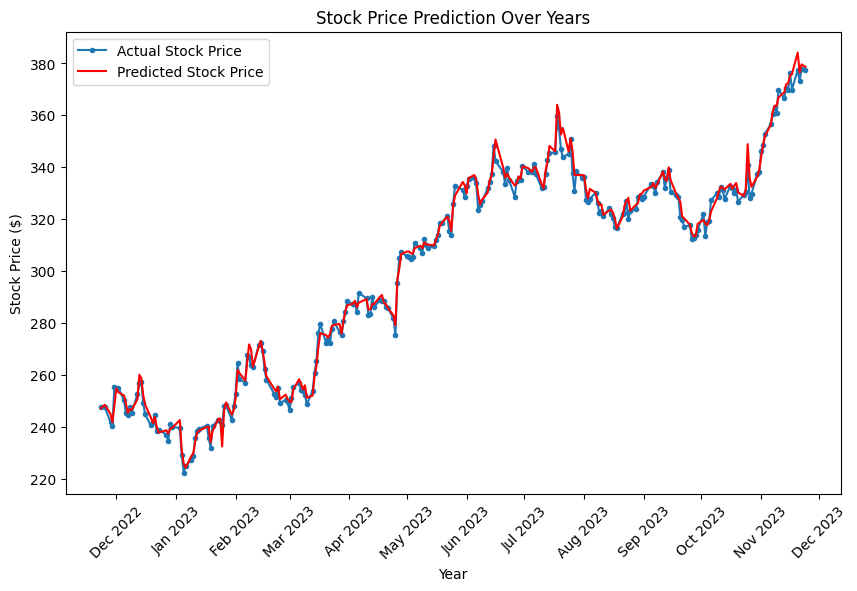

In [ ]:
test_dates = df.iloc[len(X_train):len(X_train) + len(X_test)]['Date']
test_dates = pd.to_datetime(test_dates)

start_time = time.time()
y_pred = model.predict(X_test)
predicting_time = time.time() - start_time
print(f'Predicting Time: {predicting_time} seconds')

plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, marker='.', label="Actual Stock Price")
plt.plot(test_dates, y_pred, 'r', label="Predicted Stock Price")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.ylabel('Stock Price ($)')
plt.xlabel('Year')
plt.title('Stock Price Prediction Over Years')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()

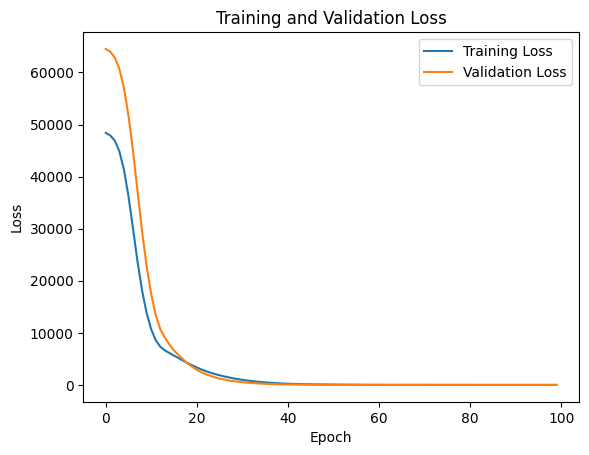

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()